In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
#importing required packages
from bs4 import BeautifulSoup
import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio import plot
import math
from datetime import datetime

#machine learning packages 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

#plotting packages
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib import patches



In [3]:
from rasterio import mask
import rasterio

In [4]:
os.chdir('../')

In [5]:
os.getcwd()

'/Users/ksunil/Desktop/Karan/Codebase'

In [6]:
#importing other python files 
import src.Tide_API as tide
import src.Depth_profile as depth
import src.Pixel_transformation as pt
import src.Sentinel2_image as s2

In [7]:
import src.Coral_Reef as coral_reef
import src.Reef_plots as reef_plots

In [8]:
data_dir = 'data'
reef_name = 'Moce'

In [9]:
reef = coral_reef.Coral_Reef(data_dir, reef_name)
coords = reef.get_bounding_box()

                                            geometry
0  POLYGON ((-178.5376060009003 -18.6365366345374...
                                            geometry
0  POLYGON ((-178.5376060009003 -18.6365366345374...


In [10]:
sentinel_img = 'S2A_MSIL2A_20190401T220921_N0211_R129_T01KCV_20190402T001930.SAFE'
sentinel_path = os.path.join(data_dir, reef_name, sentinel_img)

In [11]:
s = s2.Sentinel2_image(sentinel_path, coords)

In [12]:
imgs = s.load_sentinel()

In [26]:
p = np.percentile(imgs[0][0],80)

In [27]:
p

763.0

<IPython.core.display.Javascript object>


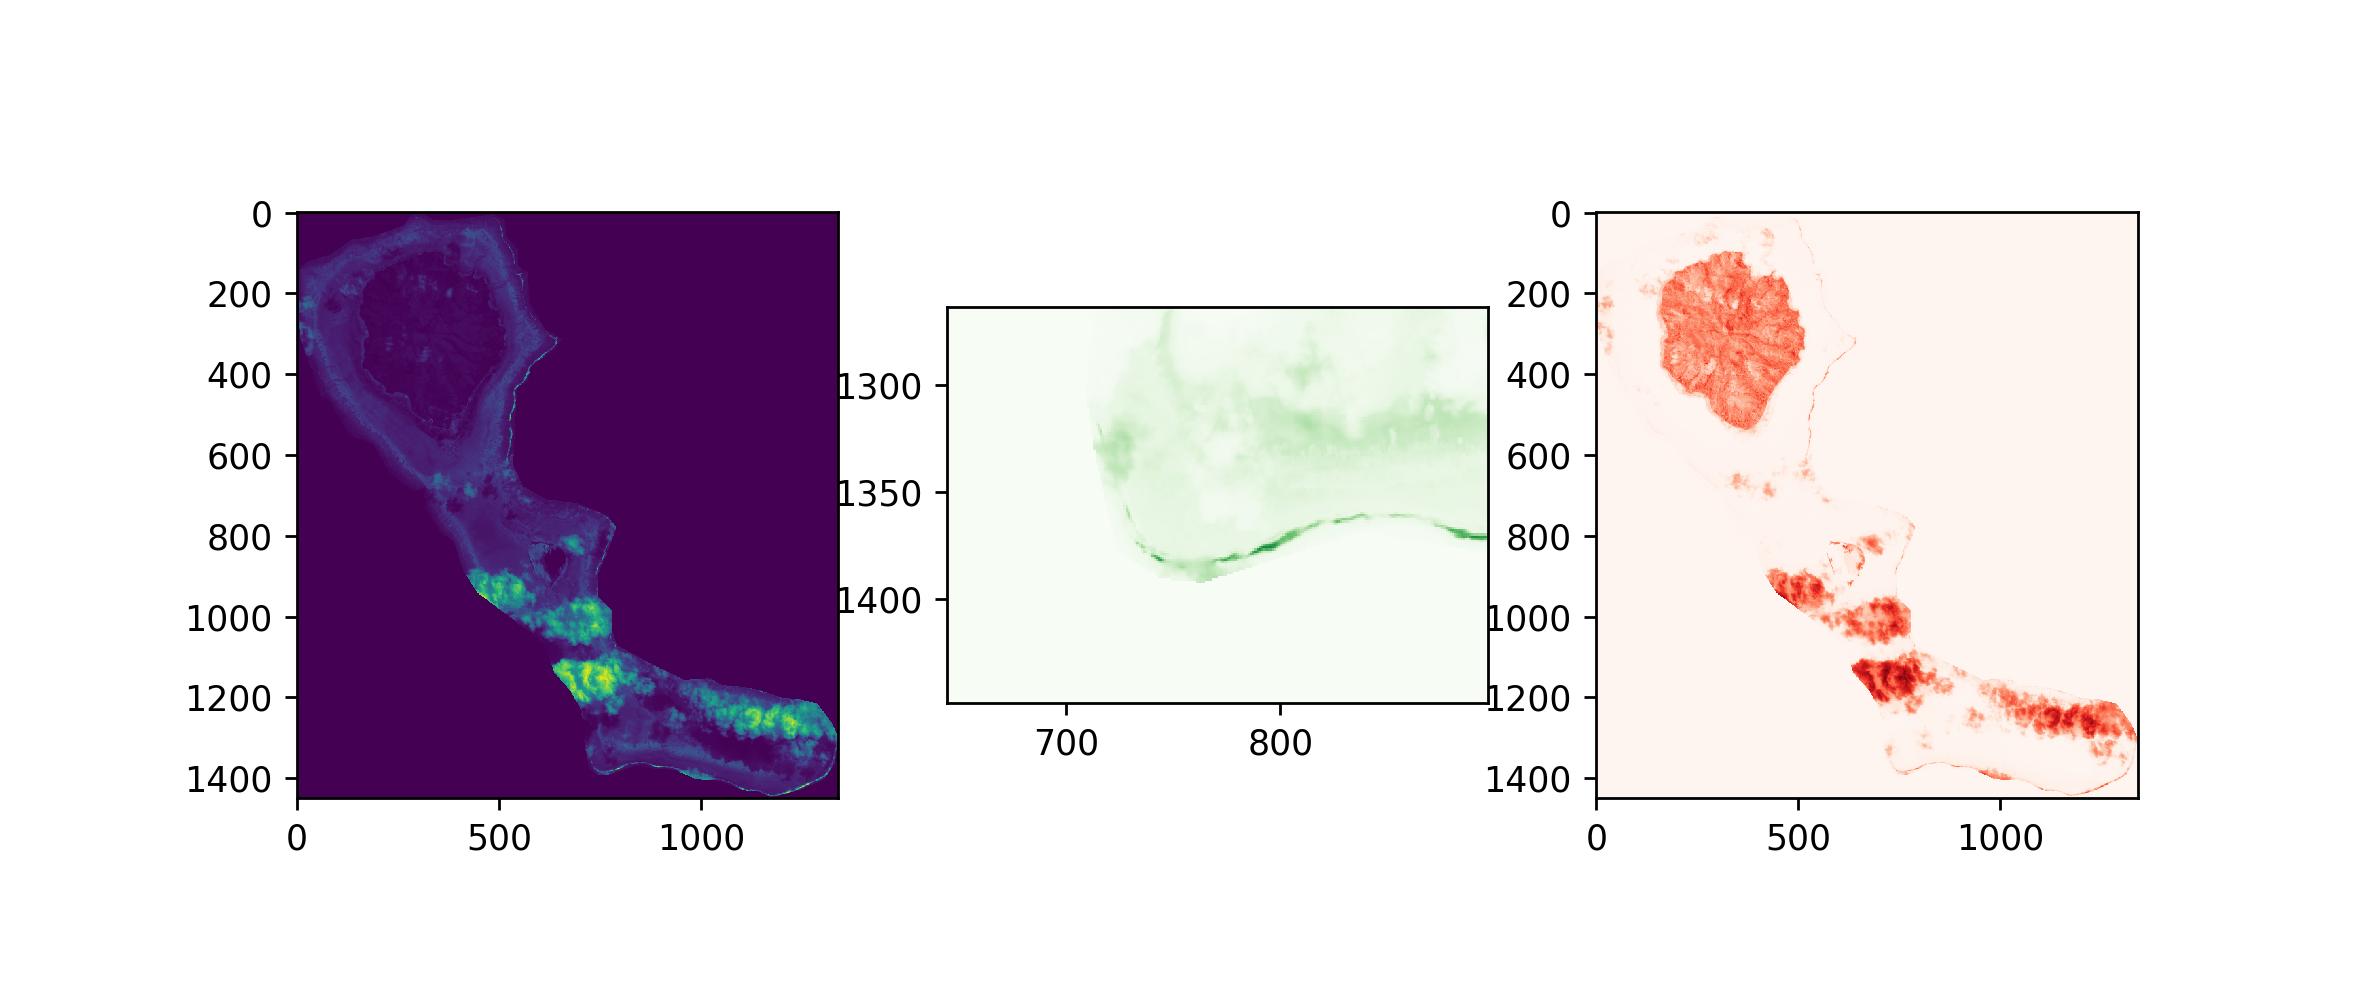

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.5, 4))
plot.show(imgs[0], ax=ax1)
plot.show(imgs[1], ax=ax2, cmap='Greens')
plot.show(imgs[3], ax=ax3, cmap='Reds')

In [83]:
r,m,d = pt.get_regressor(reef,s)

/Users/ksunil/Desktop/Karan/Codebase/src/Pixel_transformation.py:40: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(fp)


2661.812560123566
mse train  0.017912356568075924
mse test  0.01683905694501114


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
op = reef.outfile_path

In [85]:
master_fp = os.path.join(op, '{reef_name}.csv'.format(reef_name = reef_name))
master_df = pd.read_csv(master_fp)

In [86]:
median_df = master_df[['x','y','median']]


/Users/ksunil/Desktop/Karan/Codebase/src/Reef_plots.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Height'] = df['median']


<IPython.core.display.Javascript object>


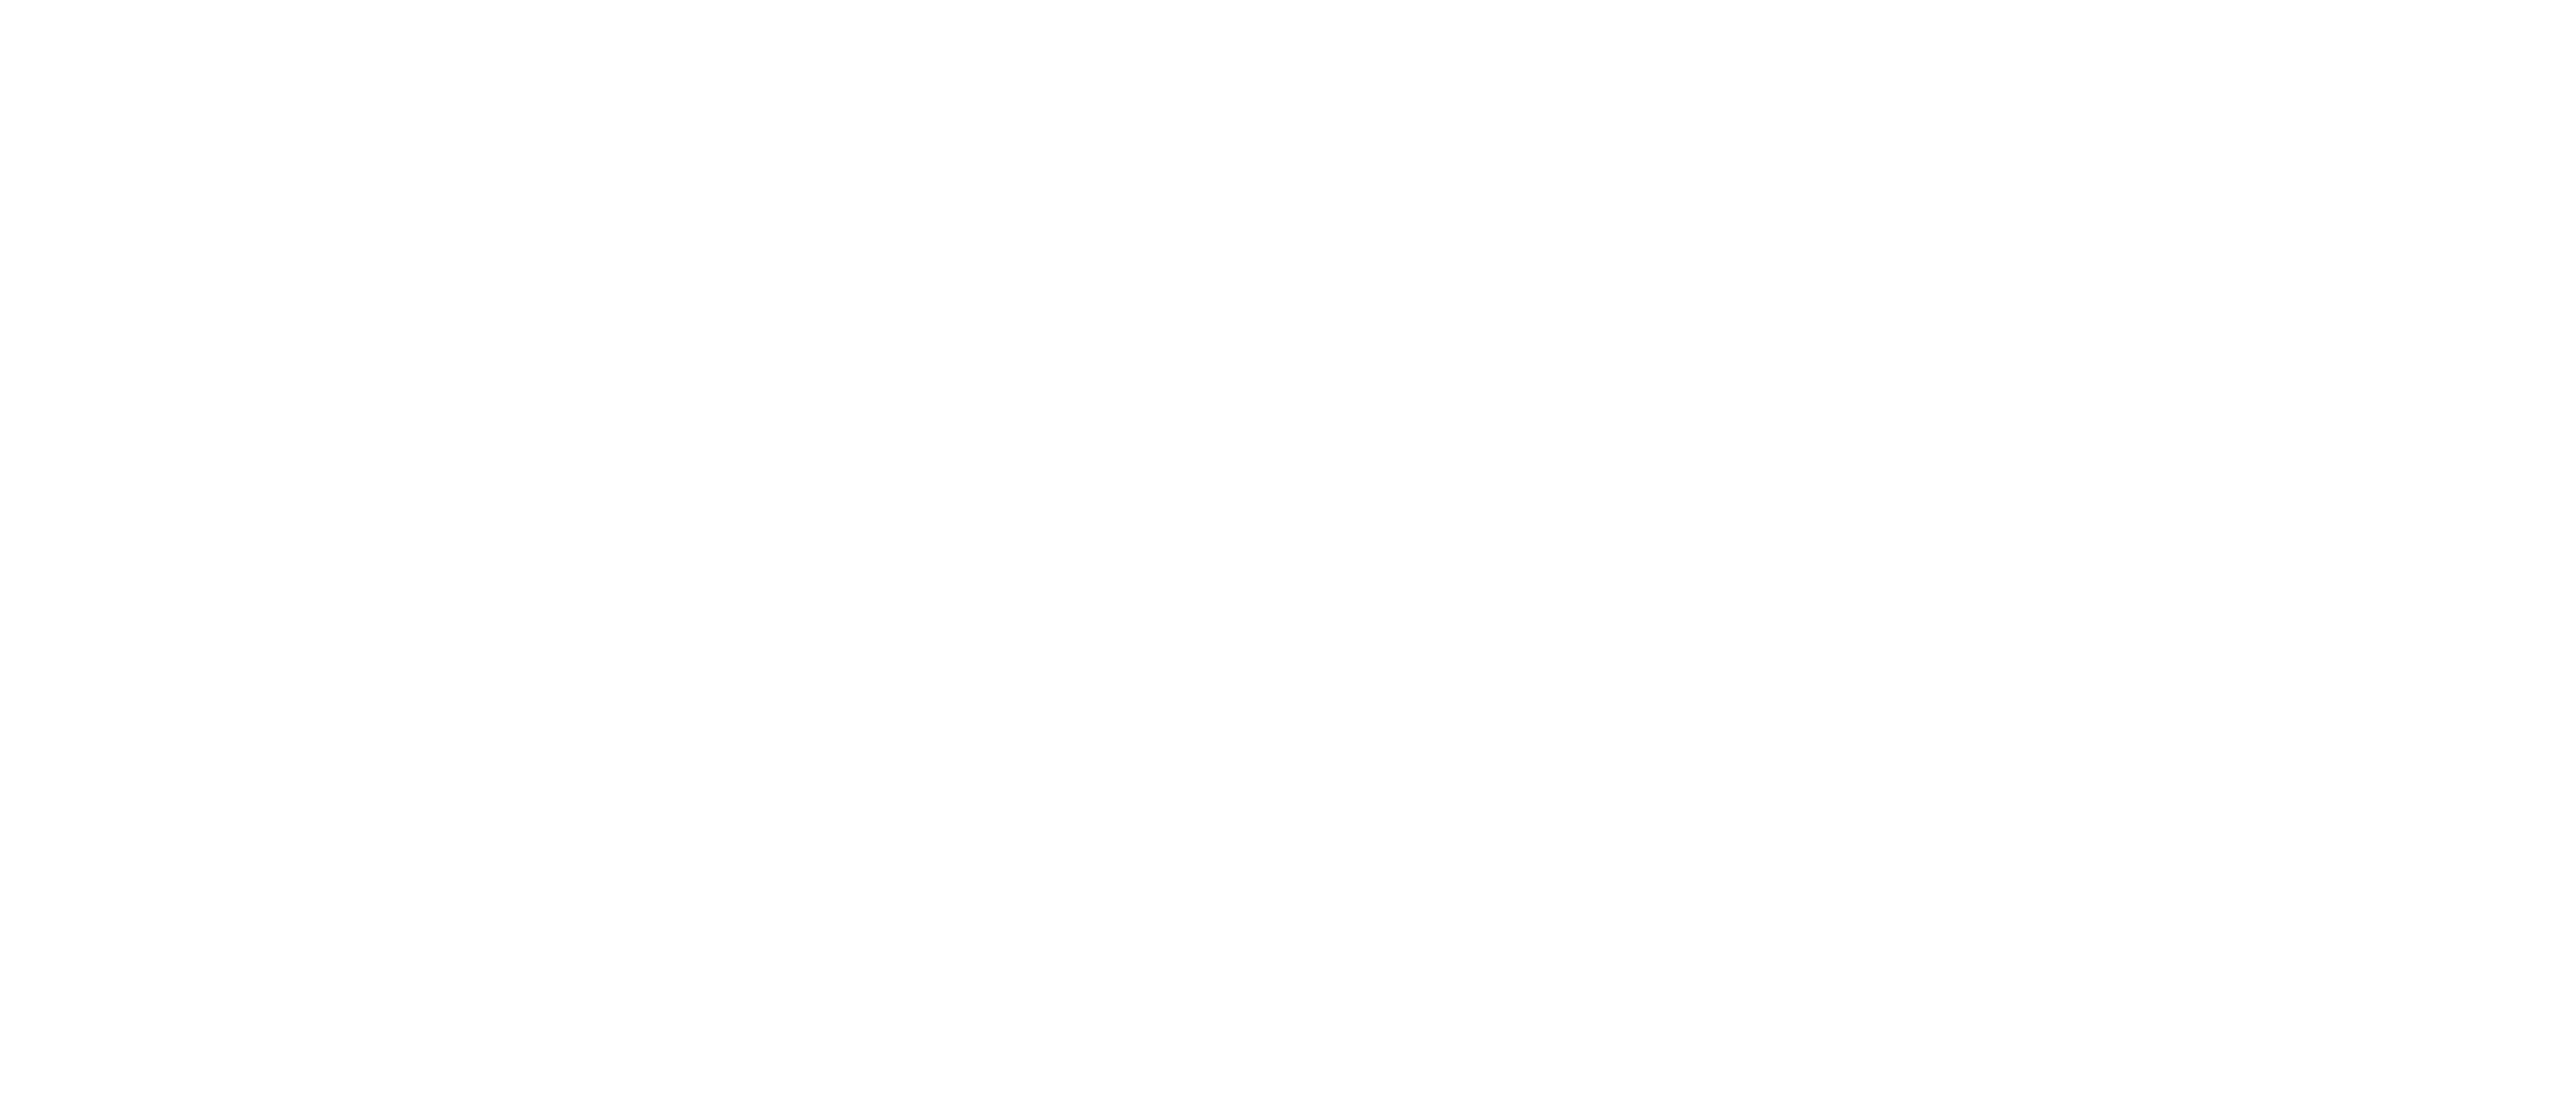

In [87]:
reef_plots.aggregate_plot(d,median_df,s,'median')

<IPython.core.display.Javascript object>


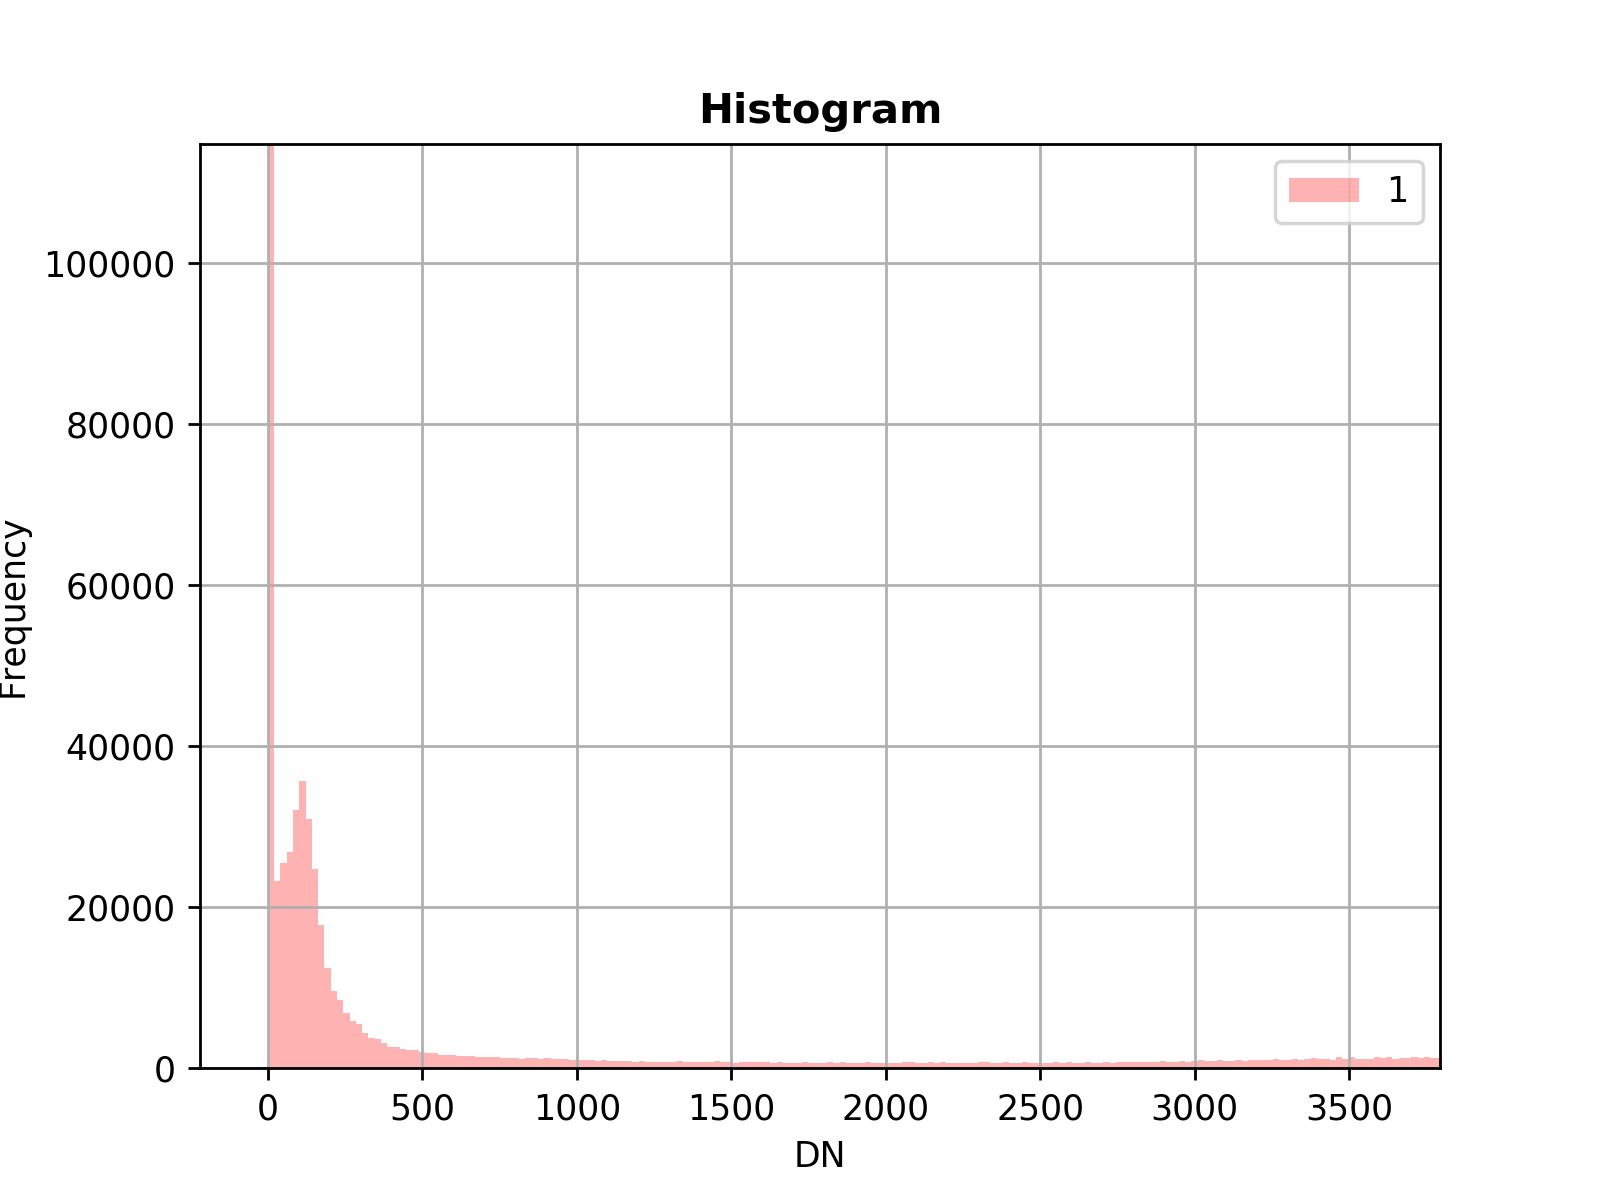

In [37]:
plt.subplots()
plot.show_hist(imgs[3], bins=500, stacked=False, alpha=0.3,  title="Histogram")

In [29]:
from rasterio import plot

In [31]:
import matplotlib.pyplot as plt

In [17]:
import glob
from pathlib import Path
# from matplotlib import 
os.getcwd()

'/Users/ksunil/Desktop/Karan/Codebase'